<a href="https://colab.research.google.com/github/alizmarossy/FAKT_ML/blob/main/2_miniprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aktivációs függvények

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import math
from matplotlib import pyplot as plt

##Sigmoid függvény

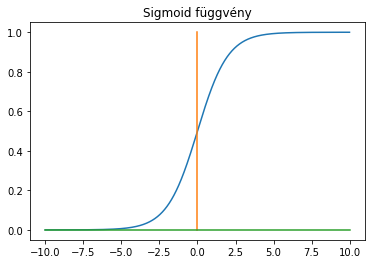

In [61]:
def sigmoid(z):
  fv = 1/(1 + math.exp(-z))
  return fv

fugg = []
for i in range (-1000,1000):
  fugg.append((sigmoid(i/100)))

xaxis = []
for i in range (-1000,1000):
  xaxis.append(float(i/100))

plt.plot(xaxis, fugg)
plt.plot([0,0], [0,1])
plt.plot([-10,10], [0,0])
plt.title('Sigmoid függvény')
plt.show()

##Tanh függvény

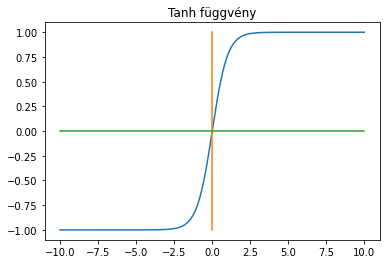

In [68]:
def tanh(z):
  fv = (math.exp(z)-math.exp(-z))/(math.exp(z)+math.exp(-z))
  return fv

fugg2 = []
for i in range (-1000,1000):
  fugg2.append((tanh(i/100)))

xaxis = []
for i in range (-1000,1000):
  xaxis.append(float(i/100))
  
plt.plot(xaxis, fugg2)
plt.plot([0,0], [-1,1])
plt.plot([-10,10], [0,0])
plt.title('Tanh függvény')
plt.show()

##Sigmoid és Tanh függvény

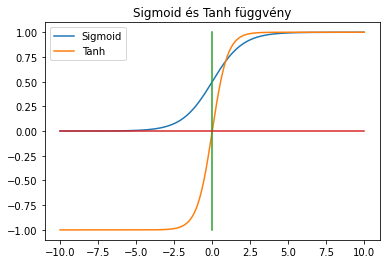

In [69]:
plt.plot(xaxis, fugg, label = 'Sigmoid')
plt.plot(xaxis, fugg2, label = 'Tanh')
plt.plot([0,0], [-1,1])
plt.plot([-10,10], [0,0])
plt.title('Sigmoid és Tanh függvény')
plt.legend()

#DNN alkalmazása

In [85]:
from google.colab import files
uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged.csv


In [106]:
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['dailyActivity_merged.csv']))

In [90]:
dataframe
#juhú végre működik, jó sok időbe tellett

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


Dataset forrása: https://www.kaggle.com/kyle007hendricks/bellabeat-dataset

Context

This Kaggle data set contains a personal fitness tracker from thirty Fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

Content

The data set was done by Bellabeat and collected data for 33 users of their physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. It includes narrow data and wide data, as well as daily, minute, and second data organized in the Month-day-year time format.

In [91]:
dataframe.shape

(940, 15)

In [93]:
dataframe.isna().sum()
#nincs na, jeej

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [99]:
dataframe.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [100]:
labeler = LabelEncoder()


In [109]:
dataframe = pd.read_csv(io.BytesIO(uploaded['dailyActivity_merged.csv']))
dataframe = dataframe.drop('Id', axis = 1)
dataframe = dataframe.drop('ActivityDate', axis = 1)
dataframe.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [110]:
y_df = dataframe.Calories

In [111]:
x_df = dataframe.copy().drop('Calories', axis = 1)

In [112]:
x_df.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773


In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(846, 12)
(94, 12)
(846,)
(94,)


In [116]:
x_test.shape[0] == y_test.shape[0]

True

##Adatnormalizálás

In [117]:
normalizer = StandardScaler()

In [118]:
normalizer.fit(x_train)

StandardScaler()

In [122]:
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [123]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.282707,0.128783,0.133041,-0.175412,-0.405496,1.662609,0.116247,-0.224246,-0.280036,1.400720,0.816950,0.246638
1,0.646715,0.898970,0.906590,-0.175412,0.739539,-0.180134,0.884453,-0.224246,0.167866,-0.269947,0.411535,0.096408
2,-1.005114,-0.984833,-0.985435,-0.175412,-0.562801,-0.632341,-0.850205,-0.224246,-0.638358,-0.674957,-0.721782,-0.524541
3,1.150577,0.896445,0.904054,-0.175412,-0.314039,5.291569,-0.091912,-0.224246,-0.369617,5.197689,-0.215014,-1.001938
4,0.671361,0.724731,0.731590,-0.175412,-0.562801,-0.632341,2.505120,-0.224246,-0.638358,-0.674957,2.632101,-1.879948
...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.477193,-0.431813,-0.430001,-0.175412,-0.482319,-0.462764,0.046861,-0.224246,-0.548778,-0.472452,-0.224228,0.917664
842,0.425298,0.545441,0.551518,-0.175412,1.544355,-0.440153,-0.805600,-0.224246,1.332413,-0.472452,-0.777066,0.907649
843,-0.488343,-0.416662,-0.414784,-0.175412,0.007887,-0.349712,-0.632134,-0.224246,0.108146,-0.219321,-0.491433,-1.192229
844,-1.255871,-1.166648,-1.168043,-0.175412,-0.562801,-0.632341,-1.207049,-0.224246,-0.638358,-0.674957,-1.256192,-0.040468


In [124]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-6.299138e-17,1.049856e-16,-2.519655e-17,-5.879195e-17,-5.879195e-17,2.939598e-17,-1.301822e-16,4.199425e-18,4.619368e-17,-6.509109e-17,3.674497e-17,1440.0
1,8.905000e+03,7.130000e+00,7.130000e+00,-5.879195e-17,5.600000e+00,1.900000e-01,1.340000e+00,4.199425e-18,4.100000e+01,4.000000e+00,8.200000e+01,1313.0
2,8.161000e+03,6.620000e+00,6.620000e+00,-5.879195e-17,3.400000e-01,7.300000e-01,5.540000e+00,4.199425e-18,4.000000e+00,1.500000e+01,2.510000e+02,757.0
3,8.482000e+03,5.700000e+00,5.700000e+00,-5.879195e-17,-5.879195e-17,2.939598e-17,5.690000e+00,1.000000e-02,4.619368e-17,-6.509109e-17,4.480000e+02,992.0
4,1.053600e+04,7.410000e+00,7.410000e+00,-5.879195e-17,2.150000e+00,6.200000e-01,4.620000e+00,1.000000e-02,1.700000e+01,7.000000e+00,2.020000e+02,1214.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89,3.090000e+03,2.080000e+00,2.080000e+00,-5.879195e-17,-5.879195e-17,2.939598e-17,2.080000e+00,4.199425e-18,4.619368e-17,-6.509109e-17,1.450000e+02,1295.0
90,1.831000e+03,1.170000e+00,1.170000e+00,-5.879195e-17,-5.879195e-17,2.939598e-17,1.170000e+00,4.199425e-18,4.619368e-17,-6.509109e-17,1.010000e+02,916.0
91,8.275000e+03,5.560000e+00,5.560000e+00,-5.879195e-17,-5.879195e-17,2.939598e-17,5.550000e+00,1.000000e-02,4.619368e-17,-6.509109e-17,3.730000e+02,1067.0
92,1.511200e+04,1.067000e+01,1.067000e+01,-5.879195e-17,3.340000e+00,1.930000e+00,5.400000e+00,4.199425e-18,4.800000e+01,6.300000e+01,2.760000e+02,1053.0


##Architektúra létrehozása

In [125]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [142]:
input = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [143]:
model = keras.Model(input, output)

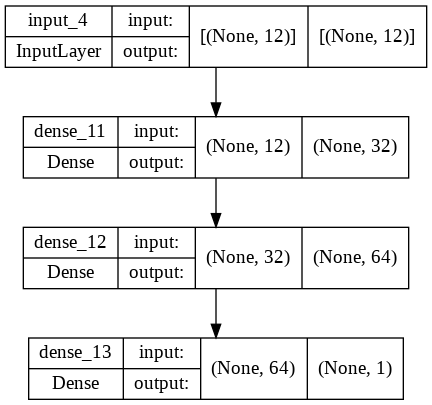

In [144]:
plot_model(model, show_shapes=True)

In [145]:
model.compile(loss='binary_crossentropy', metrics=[BinaryAccuracy()])

In [146]:
model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: -2787.4592 - binary_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: -9970.6875 - binary_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: -21054.4355 - binary_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: -37507.2227 - binary_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: -61260.0234 - binary_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: -93085.0625 - binary_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: -132836.4219 - binary_accuracy: 0.0000e+00
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: -183709.0469 - binary_accuracy: 0.0000e+00
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: -244990

In [147]:
model.predict(x_test)
#hm ez érdekes

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [148]:
model.evaluate(x=x_test, y=y_test)
#well, valami félresikerült
#de mi??

3/3 [==============================] - 0s 4ms/step - loss: -257873444864.0000 - binary_accuracy: 0.0000e+00


[-257873444864.0, 0.0]